In [265]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import mean

In [266]:
def get_dict_from_file(file : str):
    f = open("diagrams/"+file, "r")
    lines = f.read().splitlines()
    valdict = {}
    for a in lines:
        spl = a.split(' ')
        index = int(spl[0])
        val = int(spl[1])
        if index not in valdict:
            valdict[index] = list()
        valdict[index].append(val)
    return valdict



In [267]:
def gen_plot(file: str, title: str, ylim: int):
    dictionary = get_dict_from_file(file)
    indexes = list(dictionary.keys())
    values = list(dictionary.values())
    means = []
    for val in values:
        means.append(mean(val))
    plt.clf()
    if ylim > 0:
        plt.ylim([0, ylim])
    plt.xlabel("n")
    plt.title(title)
    plt.ylabel("Number of iterations")
    plt.plot(indexes, values, color = 'b', marker ='o', markersize = 0.3, linewidth = 0, label = 'simulation results')
    plt.plot(indexes, means, color = 'r', marker = 'o', markersize = 2.0, linewidth = 0, label = 'mean value')
    return [indexes, values, means]

In [268]:
def show_plot(file: str, title: str, ylim: int, subplots_ylims: list):
    indexes, values, means = gen_plot(file, title, ylim)

    handles, labels = plt.gca().get_legend_handles_labels() 
    labels = dict(zip(labels, handles))

    plt.legend(labels.values(), labels.keys())
    plt.savefig("plots/" + file.split('.')[0]+'.png')

    plt.clf()
    plt.plot(indexes, np.divide(means, indexes), marker ='o', markersize = 2.0, linewidth = 0)
    plt.title(file.split('.')[0] + "/ n")
    if subplots_ylims[0][0] >= 0:
        plt.ylim(subplots_ylims[0])
    plt.savefig("plots/" + file.split('.')[0]+'_n.png')
    plt.clf()
    plt.plot(indexes, np.divide(means, np.multiply(indexes, np.log(indexes))), marker ='o', markersize = 2.0, linewidth = 0)
    plt.title(file.split('.')[0] + "/ nln(n)")
    if subplots_ylims[1][0] >= 0:
        plt.ylim(subplots_ylims[1])
    plt.savefig("plots/" + file.split('.')[0]+'_nlnn.png')
    plt.clf()
    plt.plot(indexes, np.divide(means, np.multiply(indexes, indexes)), marker ='o', markersize = 2.0, linewidth = 0)
    plt.title(file.split('.')[0] + "/ n^2")
    if subplots_ylims[2][0] >= 0:
        plt.ylim(subplots_ylims[2])
    plt.savefig("plots/" + file.split('.')[0]+'_nn.png')
    plt.clf()
    plt.plot(indexes, np.divide(means, np.multiply(np.multiply(indexes, indexes),indexes)), marker ='o', markersize = 2.0, linewidth = 0)
    plt.title(file.split('.')[0] + "/ n^3")
    if subplots_ylims[3][0] >= 0:
        plt.ylim(subplots_ylims[3])
    plt.savefig("plots/" + file.split('.')[0]+'_nnn.png')
    plt.clf()
    plt.plot(indexes, np.divide(means, np.multiply(indexes, np.multiply(np.log(indexes), np.log(indexes)))), marker ='o', markersize = 2.0, linewidth = 0)
    plt.title(file.split('.')[0] + "/ nln^2(n)")
    if subplots_ylims[4][0] >= 0:
        plt.ylim(subplots_ylims[4])
    plt.savefig("plots/" + file.split('.')[0]+'_nlnnlnn.png')

/tmp/ipykernel_300357/1569389441.py:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  means.append(mean(val))


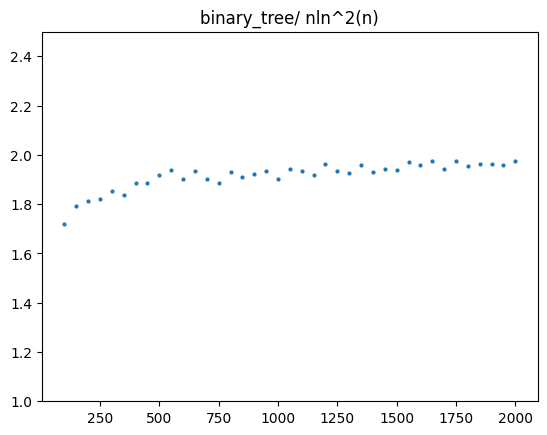

In [269]:
# gen_plot("output_clique.txt", "clique, k=1000", -1)
# gen_plot("output_path.txt", "path, k=1000", 15000000)
# gen_plot("output_path_beginning.txt", "path, start=n/2, k=1000", 15000000)
# gen_plot("output_binary_tree.txt", "binary tree, k=1000", -1)
# gen_plot("output_lolipop.txt", "lollipop, k=50", 6000000000)

# clique_sub = [[0,10], [0,2], [0,0.05], [0,0.0004]]
# show_plot("clique.txt", "clique, k=1000", -1, clique_sub)
# path_sub = [[-1, -1], [-1, -1], [0, 2], [-1, -1]]
# show_plot("path.txt", "path, k=1000", -1, path_sub)
# show_plot("path_beginning.txt", "path, start=n/2, k=1000", -1, path_sub)
binary_tree_sub = [[-1, -1], [-1, -1], [-1, -1], [-1, -1], [1, 2.5]]
show_plot("binary_tree.txt", "binary tree, k=1000", -1, binary_tree_sub)
# lollipop_sub = [[-1, -1], [-1, -1], [-1, -1], [0, 0.5]]
# show_plot("lolipop.txt", "lollipop, k=50", -1, lollipop_sub)